<a href="https://colab.research.google.com/github/Zahra2351373/COMP-6771/blob/Master/Tutorial3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import os
print(cv2.__version__, cv2.__spec__)

4.1.2 ModuleSpec(name='cv2.cv2', loader=<_frozen_importlib_external.ExtensionFileLoader object at 0x7fda55a1be80>, origin='/usr/local/lib/python3.6/dist-packages/cv2/cv2.cpython-36m-x86_64-linux-gnu.so')


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
os.chdir("/content/drive/My Drive/")
os.listdir()

['Getting started.pdf',
 'Untitled1.ipynb',
 'Colab Notebooks',
 'Untitled0.ipynb',
 'Zahra_Ebrahimi_Recommendation_June2020_2 (1).pdf',
 'Zahra_Ebrahimi_Recommendation_June2020_2.pdf',
 'Zahra_Ebrahimi_Recommendation_June2020_2.gdoc',
 'Updated Deferral Form 2020_August21.pdf',
 'Updated Deferral Form 2020_August21.gdoc',
 'I.jpg',
 'Image.jpg',
 'images',
 'gato.png']

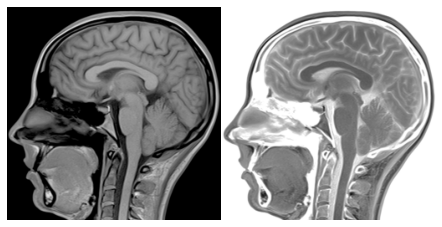

In [9]:
 I = cv2.imread('./images/head.png')
#Image negatives s=T(r)=L-1-r
# Subtract the img from max value(calculated from dtype)
I_neg = 255 - I
plt.figure('Image Negative')
plt.subplot(121), plt.imshow(I), plt.axis('off')
plt.subplot(122), plt.imshow(I_neg), plt.axis('off')
plt.tight_layout(pad=.2)
plt.show()

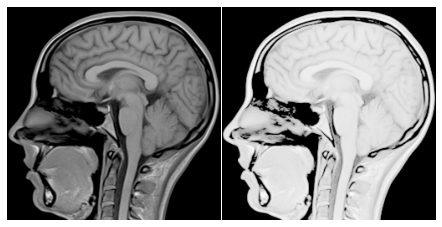

In [10]:
 # Log transformation.
c = 255/(np.log(1 + np.max(I)))
I_log = c * np.log(1 + I)
# Specify the data type.
I_log = np.array(I_log, dtype = np.uint8)
plt.figure('Log transformation')
plt.subplot(121), plt.imshow(I), plt.axis('off')
plt.subplot(122), plt.imshow(I_log), plt.axis('off')
plt.tight_layout(pad=.2)
plt.show()

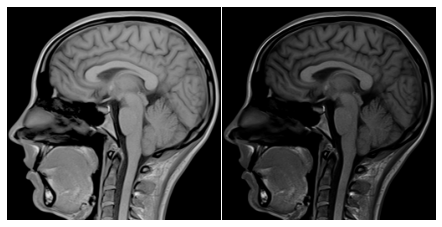

In [11]:
 #Power-Law (Gamma) Transformation
# Trying 4 gamma values.
#gamma in [0.1, 0.5, 1.2, 2.2]:
# Apply gamma correction.
gamma = 2.2
I_gamma = np.array(255*(I / 255) ** gamma, dtype = 'uint8')
plt.figure('Power-Law (Gamma) Transformation')
plt.subplot(121), plt.imshow(I), plt.axis('off')
plt.subplot(122), plt.imshow(I_gamma), plt.axis('off')
plt.tight_layout(pad=.2)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


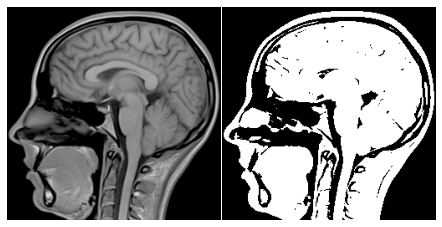

In [12]:
# Function to map each intensity level to output intensity level.
def pixelVal(pix, r1, s1, r2, s2):
 if (0 <= pix and pix <= r1):
   return (s1 / r1)*pix
 elif (r1 < pix and pix <= r2):
   return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1
 else:
    return ((255 - s2)/(255 - r2)) * (pix - r2) + s2


# Define parameters.
r1 = 70
s1 = 0
r2 = 140
s2 = 255
# Vectorize the function to apply it to each value in the Numpy array.
pixelVal_vec = np.vectorize(pixelVal)
# Apply contrast stretching.
I_contrast_stretched = pixelVal_vec(I, r1, s1, r2, s2)
plt.figure('Piece-wise Linear Transformation')
plt.subplot(121), plt.imshow(I), plt.axis('off')
plt.subplot(122), plt.imshow(I_contrast_stretched), plt.axis('off')
plt.tight_layout(pad=.2)
plt.show()

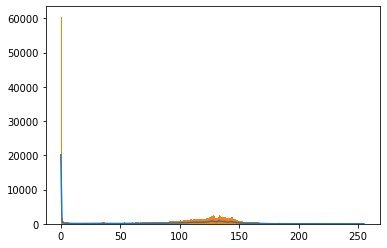

In [13]:
# find frequency of pixels in range 0-255
h = cv2.calcHist([I],[0],None,[256],[0,256])
# plot the histogram
plt.plot(h)
# alternative way to find histogram of an image
plt.hist(I.ravel(),256,[0,256])
plt.show()

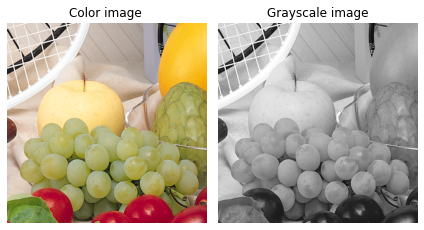

In [18]:
 I = cv2.imread('./images/fruits.png')
##OpenCV follows BGR order, while plt follows RGB order
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
J = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
plt.figure('Color and grascale images')
plt.subplot(121), plt.imshow(I), plt.title('Color image '),
plt.axis('off')
plt.subplot(122), plt.imshow(J, cmap ='gray'), plt.title('Grayscale image'),
plt.axis('off')
plt.tight_layout()
plt.show()



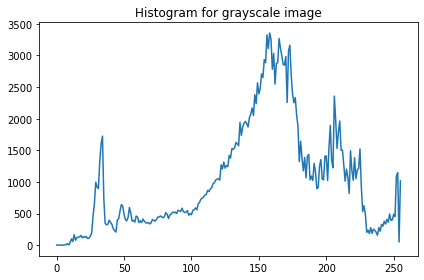

In [19]:
 #Image histogram
h = cv2.calcHist([J],[0],None,[256],[0,256])
#h = cv2.normalize(h, h).flatten()
plt.plot(h)
plt.title('Histogram for grayscale image')
plt.tight_layout()
plt.show()

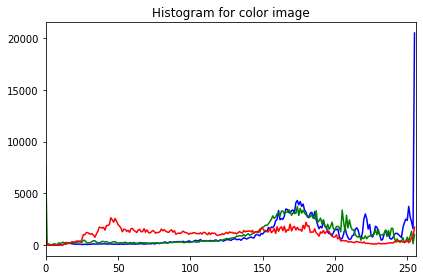

In [20]:
#color histogram
color = ('b','g','r')
for channel,col in enumerate(color):
 h = cv2.calcHist([I],[channel],None,[256],[0,256])
 #h = cv2.normalize(h, h).flatten()
 plt.plot(h,color = col)
 plt.xlim([0,256])
plt.title('Histogram for color image')
plt.tight_layout()
plt.show()

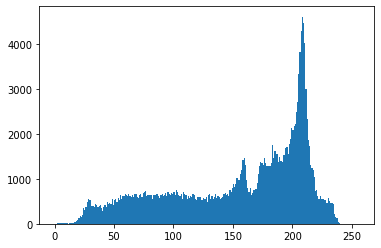

In [21]:
# alternative way to compute histogram of an image
plt.figure('Image histogram2')
I = cv2.imread('./images/chat.png')
plt.hist(I.ravel(),256,[0,256])
plt.show()

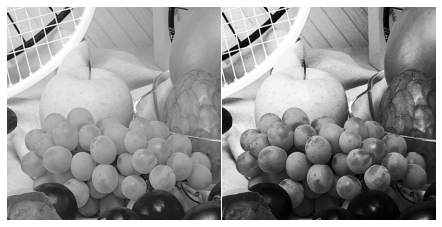

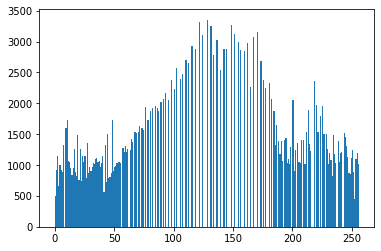

In [22]:
J_equalized = cv2.equalizeHist(J)
plt.subplot(121), plt.imshow(J, cmap ='gray'), plt.axis('off')
plt.subplot(122), plt.imshow(J_equalized, cmap ='gray'), plt.axis('off')
plt.tight_layout(pad=.2)
plt.show()
plt.hist(J_equalized.ravel(),256,[0,256])
plt.show()

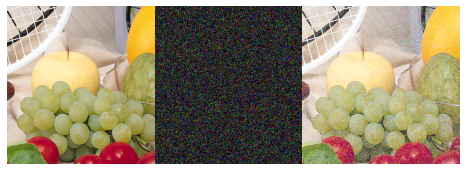

In [23]:
I = cv2.imread('./images/fruits.png')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
# Generate Gaussian noise
noise = np.random.normal(0,1,I.size)
noise = noise.reshape(I.shape[0],I.shape[1],I.shape[2]).astype('uint8')
# Add the Gaussian noise to the image
I_noisy = cv2.add(I,noise)
plt.figure('Image noise')
plt.subplot(131), plt.imshow(I), plt.axis('off')
plt.subplot(132), plt.imshow(noise), plt.axis('off')
plt.subplot(133), plt.imshow(I_noisy), plt.axis('off')
plt.tight_layout(pad=-1)
plt.show()
# plt.figure('Image noisy')
# Ic = cv2.hconcat([I,noise,I_noisy])
# plt.imshow(Ic), plt.axis('off')
# plt.show()